<a href="https://colab.research.google.com/github/diosamuel/road-crack-detection/blob/main/GLCM_FEATURE_EXTRACTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Road Crack Detection GLCM + NN

Deadline : 19 Desember 2025

https://github.com/mdprana/Realtime-Face-Emotion-Recognition-Using-GLCM-and-ANN

# Image Downloader via Roboflow

download image that has been bounded box help by roboflow

In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 73.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [2]:
!rm -r /content/RoadCrack-2

rm: cannot remove '/content/RoadCrack-2': No such file or directory


In [3]:
import os
import json
from roboflow import Roboflow
rf = Roboflow(api_key="4V6T95yomp7w4ccYHkYr")
project = rf.workspace("foreveyrone").project("roadcrack-4xqqm")
version = project.version(3)
dataset = version.download("voc")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to RoadCrack-3 in voc:: 100%|██████████| 679/679 [00:02<00:00, 339.36it/s]


In [4]:
!pip install opencv-python

In [5]:
!pip install pillow

# Cut Image based on bounding box

In [6]:
!mkdir /content/cropped/
!mkdir /content/cropped/retak
!mkdir /content/cropped/tidak-retak

In [7]:
import xml.etree.ElementTree as ET
from PIL import Image
# tree = ET.parse('data.xml')
# root = tree.getroot()

dir = os.listdir("/content/RoadCrack-3/train")
for i in dir:
  if ".xml" in i:
    with open(f"/content/RoadCrack-3/train/{i}") as f:
      content = f.read().strip()
      value = ET.fromstring(content)
      if not value.find(".//bndbox/xmin") is None:
        paths = f"/content/RoadCrack-3/train/{value.find('path').text}"
        xmin = int(value.find(".//bndbox/xmin").text)
        xmax = int(value.find(".//bndbox/xmax").text)
        ymin = int(value.find(".//bndbox/ymin").text)
        ymax = int(value.find(".//bndbox/ymax").text)
        img = Image.open(paths)
        cropped_img = img.crop((xmin, ymin, xmax, ymax)).resize((64*4, 64*4))
        classifier = value.find(".//name").text
        cropped_img.save(f"/content/cropped/{classifier}/cropped_{value.find('path').text}")
        # if cropped_img:
          # cv2.imwrite(f"/content/cropped/cropped_{paths}", cropped_img)


In [8]:
!ls /content/cropped/cropped_IMG_20251113_143926_jpg.rf.6b037bbfd44fbba61dd2abc72d898d36.jpg

ls: cannot access '/content/cropped/cropped_IMG_20251113_143926_jpg.rf.6b037bbfd44fbba61dd2abc72d898d36.jpg': No such file or directory


# GLCM Features

Contrast, Dissimilarity, Homogeneity, Energy and Correlation

In [9]:
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from skimage import data, io, feature, util, transform
from matplotlib import pyplot as plt

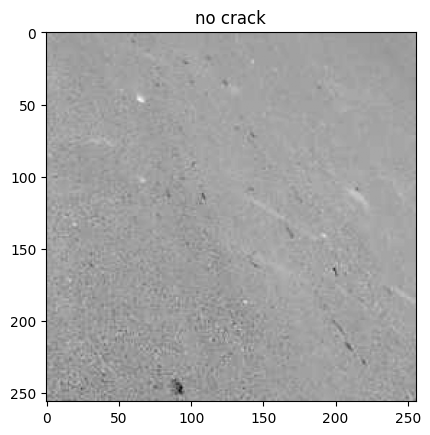

In [10]:
example = "/content/cropped/tidak-retak/cropped_IMG_20251123_160924_3_jpg.rf.bb5b566121c9b45df04b85f27e7ba141.jpg"
im_frame = Image.open(example).resize((64*4, 64*4))
image = (255*rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)

plt.imshow(imaged, cmap='gray')
plt.title(f'no crack')
plt.show()

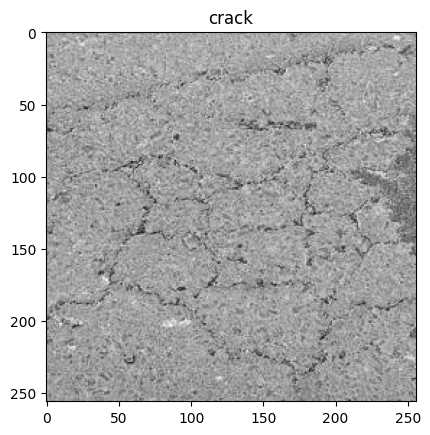

In [11]:
example = "/content/cropped/retak/cropped_IMG_20251106_150643_jpg.rf.c06a0746cde2bb34bbfe60f76420f6b7.jpg"
im_frame = Image.open(example).resize((64*4, 64*4))
image = (255*rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)

plt.imshow(imaged, cmap='gray')
plt.title(f'crack')
plt.show()

# Init GLCM Function

In [12]:
def glcm_process(img, path="/content/cropped/"):
    im_frame = Image.open(f"{path}{img}")
    if im_frame.mode == "RGBA":
        im_frame = im_frame.convert("RGB")
    im_frame = im_frame.resize((64*2, 64*2))
    image = (256 * rgb2gray(np.array(im_frame))).astype(np.uint8)
    image = util.img_as_ubyte(image)
    # GLCM
    distances = [50]
    angles = [0, 45, 90, 135, 180]
    glcm = graycomatrix(
        image,
        distances=distances,
        angles=angles,
        levels=256,
        symmetric=True,
        normed=True
    )
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')
    return contrast, dissimilarity, homogeneity, energy, correlation


# Crafting Dataframe

In [13]:
import pandas as pd

df_crack = pd.DataFrame(columns=["contrast","dissimiliarity","homogeneity","energy","correlation"])
df_no_crack = pd.DataFrame(columns=["contrast","dissimiliarity","homogeneity","energy","correlation"])

In [14]:
df_crack,df_no_crack

(Empty DataFrame
 Columns: [contrast, dissimiliarity, homogeneity, energy, correlation]
 Index: [],
 Empty DataFrame
 Columns: [contrast, dissimiliarity, homogeneity, energy, correlation]
 Index: [])

In [15]:
cropped_dir = os.listdir("/content/cropped/retak")
for img in cropped_dir:
  contrast,dissimiliarity,homogeneity,energy,correlation=glcm_process(img,path="/content/cropped/retak/")
  row = pd.DataFrame({
      'contrast': contrast[0][0],
      'dissimiliarity': dissimiliarity[0][0],
      'homogeneity': homogeneity[0][0],
      'energy': energy[0][0],
      'correlation': correlation[0][0]
  }, index=[0])
  df_crack = pd.concat([df_crack, row], ignore_index=True)

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [16]:
cropped_dir = os.listdir("/content/cropped/tidak-retak")
for img in cropped_dir:
  contrast,dissimiliarity,homogeneity,energy,correlation=glcm_process(img,path="/content/cropped/tidak-retak/")
  row = pd.DataFrame({
      'contrast': contrast[0][0],
      'dissimiliarity': dissimiliarity[0][0],
      'homogeneity': homogeneity[0][0],
      'energy': energy[0][0],
      'correlation': correlation[0][0]
  }, index=[0])
  df_no_crack = pd.concat([df_no_crack, row], ignore_index=True)

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [17]:
df_crack

,contrast,dissimiliarity,homogeneity,energy,correlation
0,104.873498,8.048978,0.117030,0.037758,0.261015
1,172.457532,8.742187,0.131962,0.042414,0.049060
2,2908.227865,40.824219,0.036474,0.013628,-0.054520
3,500.868490,16.239683,0.070621,0.025344,0.010599
4,60.994491,5.877905,0.165227,0.056366,0.072415
...,...,...,...,...,...
180,317.452624,13.447216,0.082832,0.027155,0.018897
181,653.065605,19.927384,0.053425,0.019383,-0.055564
182,485.048077,17.045272,0.063886,0.020488,0.204920
183,657.962340,19.900841,0.052338,0.019390,-0.015574


In [18]:
df_no_crack

,contrast,dissimiliarity,homogeneity,energy,correlation
0,56.939002,5.745092,0.167353,0.056346,0.109502
1,41.261919,4.872296,0.188077,0.069709,0.027291
2,258.938502,12.023838,0.087492,0.030491,0.013031
3,168.626102,9.595653,0.113111,0.034457,0.270535
4,395.452224,14.976262,0.071897,0.024727,-0.010910
...,...,...,...,...,...
148,15.497796,2.844351,0.306265,0.114331,0.109382
149,238.751903,11.352464,0.096419,0.033576,-0.004265
150,40.488482,4.777344,0.201981,0.060708,0.254124
151,50.207732,5.429687,0.171867,0.054198,0.249226


Contrast: Measures the local variations in the image. High contrast values indicate large differences between neighboring pixel intensities.

Dissimilarity: Measures the average difference in intensity between neighboring pixels. High dissimilarity values indicate greater heterogeneity in texture.

Homogeneity: Reflects the closeness of the distribution of elements in the GLCM to the GLCM diagonal. High homogeneity values indicate that elements are concentrated along the diagonal, suggesting a more uniform texture.

Energy (or Angular Second Moment): Represents the orderliness or homogeneity of the image. High energy values indicate more uniform texture.

Correlation: Measures the linear dependency between pixel pairs. High correlation values indicate a more predictable texture.

In [19]:
import pandas as pd

df_crack['label'] = 1
df_no_crack['label'] = 0

df = pd.concat([df_crack, df_no_crack], ignore_index=True)
df

,contrast,dissimiliarity,homogeneity,energy,correlation,label
0,104.873498,8.048978,0.117030,0.037758,0.261015,1
1,172.457532,8.742187,0.131962,0.042414,0.049060,1
2,2908.227865,40.824219,0.036474,0.013628,-0.054520,1
3,500.868490,16.239683,0.070621,0.025344,0.010599,1
4,60.994491,5.877905,0.165227,0.056366,0.072415,1
...,...,...,...,...,...,...
333,15.497796,2.844351,0.306265,0.114331,0.109382,0
334,238.751903,11.352464,0.096419,0.033576,-0.004265,0
335,40.488482,4.777344,0.201981,0.060708,0.254124,0
336,50.207732,5.429687,0.171867,0.054198,0.249226,0


In [20]:
X = df[['contrast','dissimiliarity','homogeneity','energy','correlation']]
y = df['label']

X,y

(        contrast  dissimiliarity  homogeneity    energy  correlation
 0     104.873498        8.048978     0.117030  0.037758     0.261015
 1     172.457532        8.742187     0.131962  0.042414     0.049060
 2    2908.227865       40.824219     0.036474  0.013628    -0.054520
 3     500.868490       16.239683     0.070621  0.025344     0.010599
 4      60.994491        5.877905     0.165227  0.056366     0.072415
 ..           ...             ...          ...       ...          ...
 333    15.497796        2.844351     0.306265  0.114331     0.109382
 334   238.751903       11.352464     0.096419  0.033576    -0.004265
 335    40.488482        4.777344     0.201981  0.060708     0.254124
 336    50.207732        5.429687     0.171867  0.054198     0.249226
 337   681.651042       21.095353     0.044566  0.018852    -0.109545
 
 [338 rows x 5 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 333    0
 334    0
 335    0
 336    0
 337    0
 Name: label, Length: 3

In [21]:
def decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    max_row = data.max(axis=0)
    c = np.array([len(str(int(number))) for number in np.abs(max_row)])
    return data/(10**c)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled

# X_scaled = decimal_scaling(X)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    # Dense(16, activation='relu'),
    Dense(30, activation='relu'), # Dense layer pertama dengan 30 neuron dan fungsi aktivasi ReLU
    Dense(256, activation='relu'), # Dense layer kedua dengan 256 neuron dan fungsi aktivasi ReLU
    Dense(512, activation='relu'), # Dense layer ketiga dengan 512 neuron dan fungsi aktivasi ReLU
    Dense(1024, activation='relu'), # Dense layer keempat dengan 1024 neuron dan fungsi aktivasi ReLU
    Dropout(0.25), # Lapisan dropout untuk mencegah overfitting, dengan 25% neuron
    Dense(1024, activation='relu'), # Dense layer nkelima dengan 1024 neuron dan fungsi aktivasi ReLU
    Dense(512, activation='relu'), # Dense layer keenam dengan 512 neuron dan fungsi aktivasi ReLU
    Dense(256, activation='relu'), # Dense layer ketujuh dengan 256 neuron dan fungsi aktivasi ReLU
    Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.summary()
# {'num_layers': 2, 'units': 32, 'dropout': 0.0, 'optimizer': 'rmsprop', 'lr': 0.01, 'batch_size': 16, 'epochs': 10}

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,371,999 (9.05 MB)

 Trainable params: 2,371,999 (9.05 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.2,
)
# {'num_layers': 2, 'units': 32, 'dropout': 0.0, 'optimizer': 'rmsprop', 'lr': 0.01, 'batch_size': 16, 'epochs': 10}


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.4947 - loss: 1.1827 - val_accuracy: 0.7593 - val_loss: 0.5566
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6192 - loss: 0.5642 - val_accuracy: 0.8333 - val_loss: 0.7348
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7820 - loss: 1.2189 - val_accuracy: 0.6111 - val_loss: 0.5125
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7104 - loss: 0.6136 - val_accuracy: 0.7222 - val_loss: 0.5339
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6939 - loss: 0.5218 - val_accuracy: 0.7778 - val_loss: 0.5174
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7351 - loss: 0.5467 - val_accuracy: 0.7593 - val_loss: 0.5123
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7459 - loss: 0.4842 - val_accuracy: 0.6667 - val_loss: 0.5608
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6894 - loss: 0.5308 - val_accuracy: 0.6296 - v

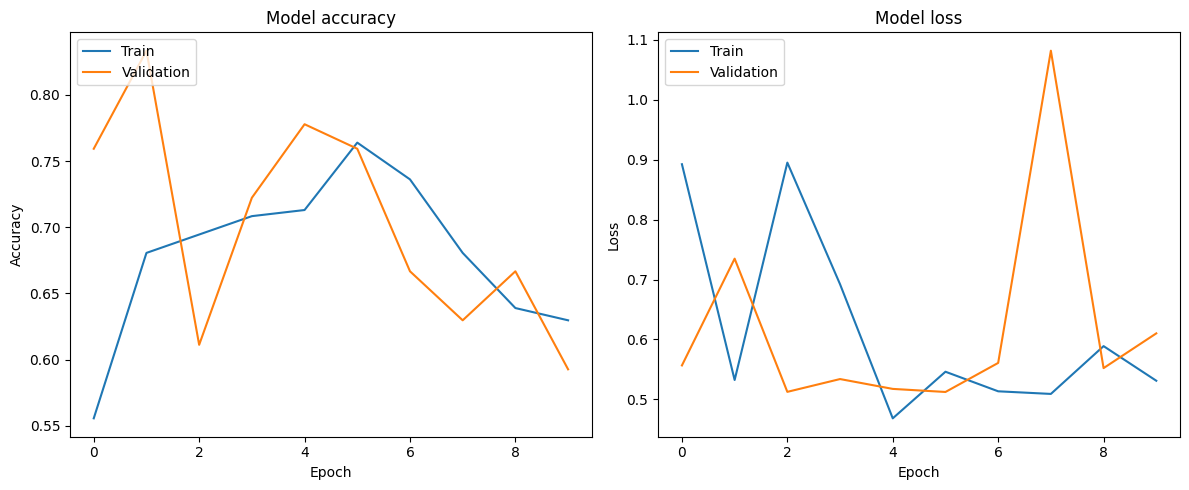

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [27]:
loss, acc = model.evaluate(X_test, y_test)
print("Accuracy:", acc)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5910 - loss: 0.5257
Accuracy: 0.5882353186607361


In [28]:
{'num_layers': 2, 'units': 32, 'dropout': 0.0, 'optimizer': 'rmsprop', 'lr': 0.01, 'batch_size': 16, 'epochs': 10}

{'num_layers': 2,
 'units': 32,
 'dropout': 0.0,
 'optimizer': 'rmsprop',
 'lr': 0.01,
 'batch_size': 16,
 'epochs': 10}

# Testing

Saving retak.jpg to retak.jpg


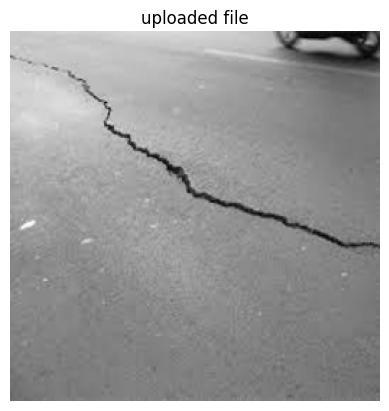

In [29]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
from PIL import Image
from skimage.color import rgb2gray
from skimage import util
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = list(uploaded.keys())[0]
img = cv2.imread(filename)

#cv rgb ke bgr
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# preprocess
im_frame = Image.fromarray(img_rgb).resize((64*4, 64*4))
image = (255 * rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)
plt.imshow(imaged, cmap='gray')
plt.title('uploaded file')
plt.axis('off')
plt.show()

In [32]:
sample = glcm_process(filename,path='/content/')
# sample = np.array(sample).reshape(1,5)
# sample
sample

(array([[1487.55068109, 1363.15605536, 1170.9636281 , 1369.35215054,
         1356.27156772]]),
 array([[24.8661859 , 31.35259516, 25.20709252, 23.80955335, 31.16187384]]),
 array([[0.05970563, 0.00593387, 0.03858286, 0.05769497, 0.00521722]]),
 array([[0.01816397, 0.01870967, 0.01750103, 0.01847552, 0.01887102]]),
 array([[0.14512541, 0.06712204, 0.20026685, 0.17860588, 0.06004594]]))

In [33]:
import numpy as np

sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)
print("Prediksi crack:", pred[0][0])

if pred[0][0] < 0.5:
  print("tidak retak")
else:
  print("retak nih 😂")

X does not have valid feature names, but StandardScaler was fitted with feature names


ValueError: Found array with dim 3. StandardScaler expected <= 2.

# Random Search

# Compile Model

In [ ]:
import joblib
joblib.dump(model,"glcmv1.pkl")

In [ ]:
modeljoblib = joblib.load('glcmv1.pkl')

# Use the loaded model to make predictions
print("After save:",modeljoblib.predict(X_test))

In [ ]:
import numpy as np

Vsample_scaled = scaler.transform(sample)
Vpred = modeljoblib.predict(Vsample_scaled)
print("Prediksi crack:", pred[0][0])

if Vpred[0][0] < 0.5:
  print("tidak retak")
else:
  print("retak nih 😂")